# Additional Analysis


In this notebook, I will be looking into word frequency over time and exploring whether the frequency of certain words changes or not.

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-dark') 

In [4]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


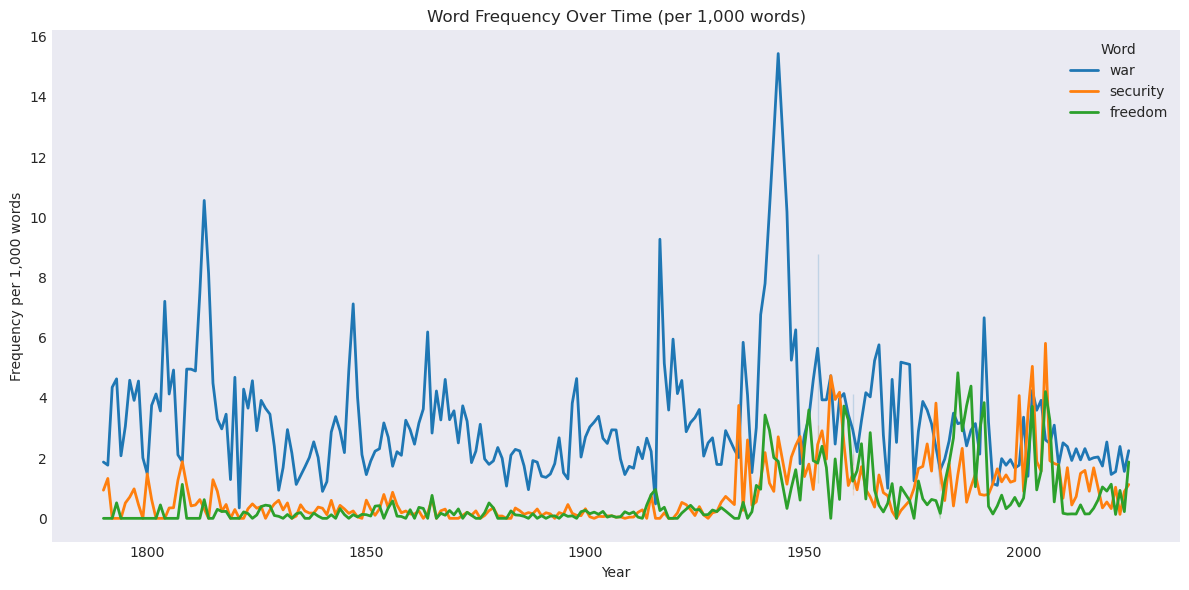

In [5]:
words = ["war", "security", "freedom"]
sou["cleaned"] = sou["Text"].str.lower()

def count_word(text, word):
    return text.count(word)
    
freq_df = pd.DataFrame()

for word in words:
    freq_df[word] = sou["cleaned"].apply(lambda x: count_word(x, word))

freq_df["Year"] = sou["Year"]
freq_df["President"] = sou["President"]
freq_df["Word Count"] = sou["Word Count"]

for word in words:
    freq_df[f"{word}_norm"] = freq_df[word] / freq_df["Word Count"] * 1000

plt.figure(figsize=(12,6))
for word in words:
    sns.lineplot(data=freq_df, x="Year", y=f"{word}_norm", label=word, linewidth=2)

plt.title("Word Frequency Over Time (per 1,000 words)")
plt.ylabel("Frequency per 1,000 words")
plt.xlabel("Year")
plt.legend(title="Word")
plt.tight_layout()
plt.savefig("outputs/p4_word_frequency_over_time.png")
plt.show()

To make this visualization, I first chose which words I wanted to see change from the presidential speeches. After looking into different words, I chose "war", "security", and "freedom". I cleaned the speeches by lowercasing them and parsing through them to create a new dataframe that had the frequency for each of the words I chose. It's interesting to see that we have had many peaks with "war": notably, around 1815, 1910, and 1950. This makes sense because we had the war of 1812 for the first peak, then a second rise around the 1860s corresponding to the Civil War. The later spikes align with major global conflicts such as World War I and World War II, as well as the Cold War period, when military activity and international tensions were central topics in presidential speeches. These patterns suggest that the frequency of this word closely tracks moments of heightened national conflict, making it a good indicator of how external events shape the themes emphasized in State of the Union addresses.